# Adding Noise

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2
from scipy import ndimage
from scipy import stats

## Loading the image

In [5]:
im_location = 'images/graf_small.png'

In [6]:
# color_im = imageio.imread(im_location)
# gray_im = cv2.cvtColor(color_im, cv2.COLOR_BGRA2GRAY)

input_im = cv2.imread(im_location, cv2.IMREAD_GRAYSCALE).astype(np.float32)

result_im = input_im.copy()
result_im

array([[211., 196., 171., ...,  33.,  32.,  25.],
       [198., 211., 207., ...,  33.,  32.,  30.],
       [111., 149., 188., ...,  34.,  29.,  30.],
       ...,
       [ 75.,  74.,  73., ...,  46.,  45.,  46.],
       [ 69.,  72.,  78., ...,  43.,  42.,  39.],
       [ 72.,  73.,  72., ...,  39.,  41.,  39.]], dtype=float32)

## Add Noise functions

In [7]:
def sample_points(m_shape, p = 0.05):
    num_points = m_shape[0] * m_shape[1]
    sample_size = round(num_points * p)
    
    x = np.round(np.random.random(sample_size) * (m_shape[0] - 1))
    y = np.round(np.random.random(sample_size) * (m_shape[1] - 1))
    
    return np.array([x, y]).astype(np.int32)

def impulse_noise(im, p=0.05):
    res = im.copy()
    x, y = sample_points(im.shape, p=p)

    res[x, y] = 255
    return res

def salt_pepper_noise(im, p=0.05):
    res = im.copy()
    x, y = sample_points(im.shape, p=p)

    res[x, y] = [(255 if i >= 0.5 else 0) for i in np.random.random(len(x))]
    return res

def gaussian_noise(im, mu=0, sigma=1, p=0.05):
    res = im.copy()
    x, y = sample_points(im.shape, p=p)

    res[x, y] += np.random.normal(mu, sigma, len(x))
    
    res = np.clip(res, 0, 255)
    return res

## Plot noises

Text(0.5, 1.0, 'Impulse')

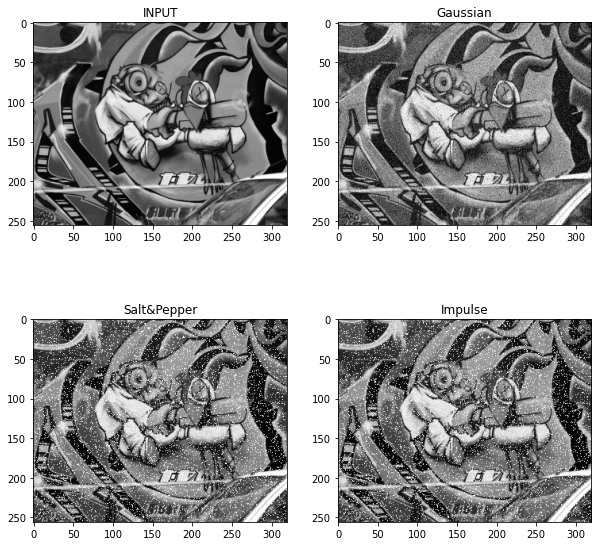

In [8]:
gaussian_im = gaussian_noise(input_im, mu = 0, sigma = 30, p=0.5)
salt_pepper_im = salt_pepper_noise(input_im, p = 0.1)
impulse_im = impulse_noise(input_im, p = 0.1)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0][0].imshow(input_im, cmap='gray')
axes[0][0].set_title('INPUT')
axes[0][1].imshow(gaussian_im, cmap='gray')
axes[0][1].set_title('Gaussian')
axes[1][0].imshow(impulse_im, cmap='gray')
axes[1][0].set_title('Salt&Pepper')
axes[1][1].imshow(impulse_im, cmap='gray')
axes[1][1].set_title('Impulse')

Text(0.5, 1.0, 'Impulse')

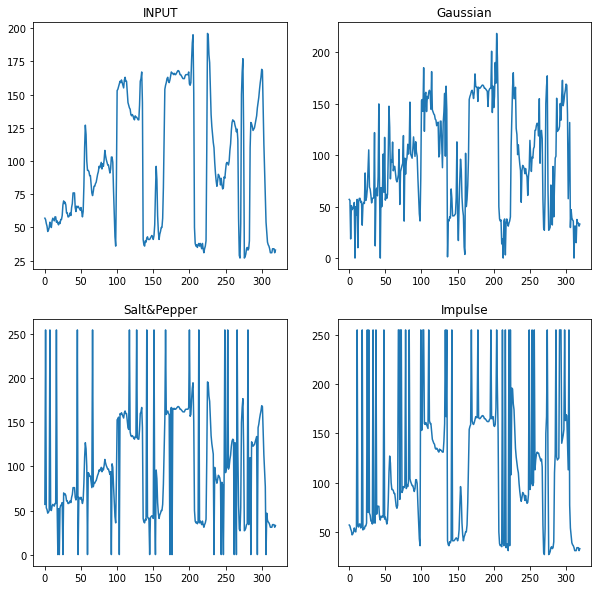

In [9]:
n = len(input_im[50])
x = np.arange(0, n)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0][0].plot(x, input_im[50])
axes[0][1].plot(x, gaussian_im[50])
axes[1][0].plot(x, salt_pepper_im[50])
axes[1][1].plot(x, impulse_im[50])
axes[0][0].set_title('INPUT')
axes[0][1].set_title('Gaussian')
axes[1][0].set_title('Salt&Pepper')
axes[1][1].set_title('Impulse')

In [10]:
cv2.imwrite( "./graf_small-gaussian.jpg", gaussian_im)
cv2.imwrite( "./graf_small-salt_pepper.jpg", salt_pepper_im)
cv2.imwrite( "./graf_small-impulse.jpg", impulse_im)

True

# Removing Noise

Text(0.5, 1.0, 'Gaussian median blur')

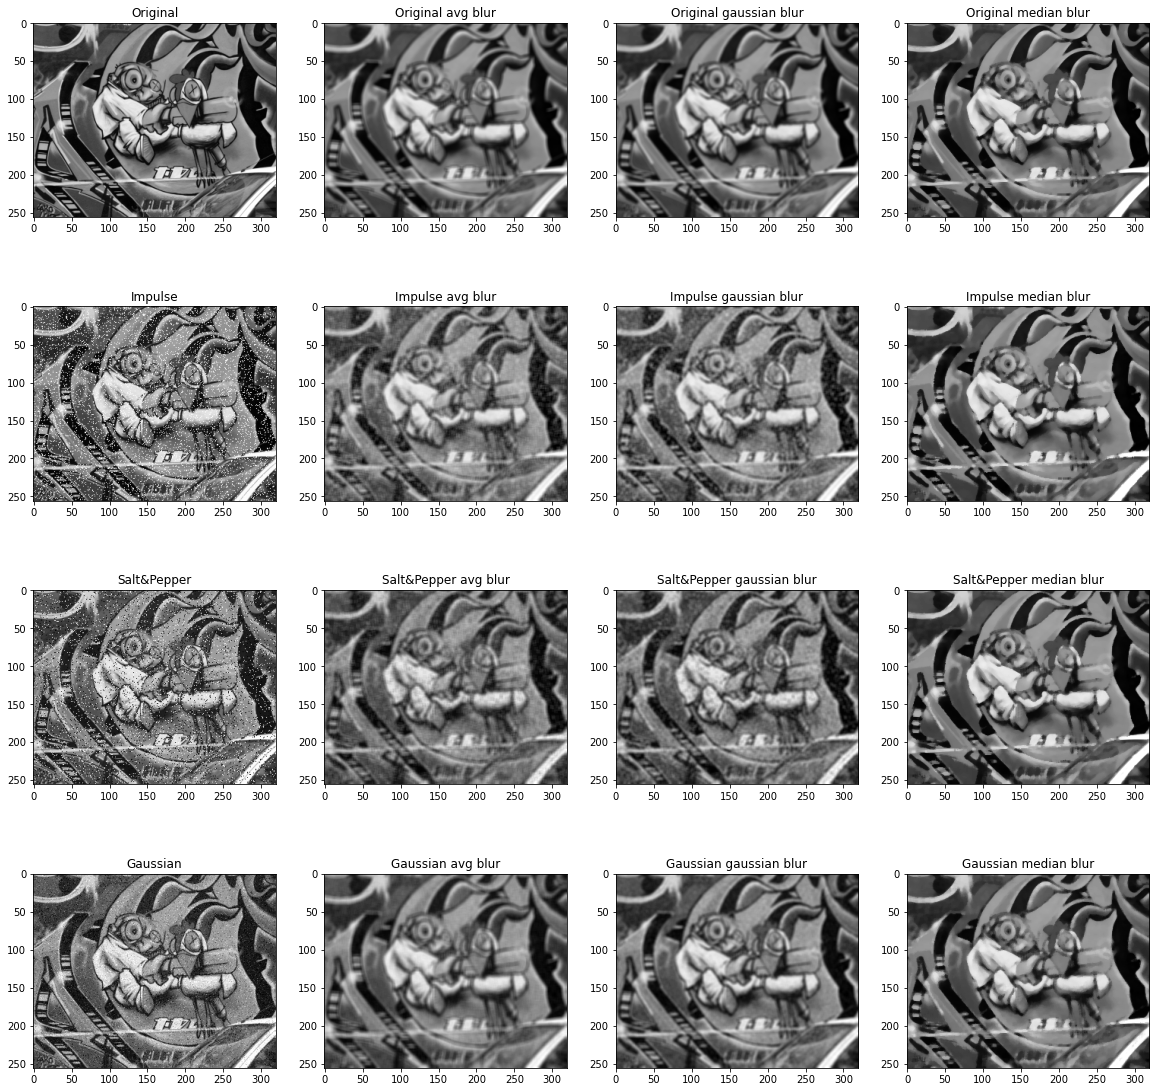

In [11]:
input_avg_blur_im = cv2.blur(input_im, (5, 5))
input_gaussian_blur_im = cv2.GaussianBlur(input_im, (5, 5), 2)
input_median_blur_im = cv2.medianBlur(input_im,5)

impulse_avg_blur_im = cv2.blur(impulse_im, (5, 5))
impulse_gaussian_blur_im = cv2.GaussianBlur(impulse_im, (5, 5), 2)
impulse_median_blur_im = cv2.medianBlur(impulse_im,5)

salt_pepper_avg_blur_im = cv2.blur(salt_pepper_im, (5, 5))
salt_pepper_gaussian_blur_im = cv2.GaussianBlur(salt_pepper_im, (5, 5), 2)
salt_pepper_median_blur_im = cv2.medianBlur(salt_pepper_im,5)

gaussian_avg_blur_im = cv2.blur(gaussian_im, (5, 6))
gaussian_gaussian_blur_im = cv2.GaussianBlur(gaussian_im, (5, 5), 2)
gaussian_median_blur_im = cv2.medianBlur(gaussian_im,5)


fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes[0][0].imshow(input_im, cmap='gray')
axes[0][0].set_title('Original')
axes[0][1].imshow(input_avg_blur_im, cmap='gray')
axes[0][1].set_title('Original avg blur')
axes[0][2].imshow(input_gaussian_blur_im, cmap='gray')
axes[0][2].set_title('Original gaussian blur')
axes[0][3].imshow(input_median_blur_im, cmap='gray')
axes[0][3].set_title('Original median blur')

axes[1][0].imshow(impulse_im, cmap='gray')
axes[1][0].set_title('Impulse')
axes[1][1].imshow(impulse_avg_blur_im, cmap='gray')
axes[1][1].set_title('Impulse avg blur')
axes[1][2].imshow(impulse_gaussian_blur_im, cmap='gray')
axes[1][2].set_title('Impulse gaussian blur')
axes[1][3].imshow(impulse_median_blur_im, cmap='gray')
axes[1][3].set_title('Impulse median blur')

axes[2][0].imshow(salt_pepper_im, cmap='gray')
axes[2][0].set_title('Salt&Pepper')
axes[2][1].imshow(salt_pepper_avg_blur_im, cmap='gray')
axes[2][1].set_title('Salt&Pepper avg blur')
axes[2][2].imshow(salt_pepper_gaussian_blur_im, cmap='gray')
axes[2][2].set_title('Salt&Pepper gaussian blur')
axes[2][3].imshow(salt_pepper_median_blur_im, cmap='gray')
axes[2][3].set_title('Salt&Pepper median blur')

axes[3][0].imshow(gaussian_im, cmap='gray')
axes[3][0].set_title('Gaussian')
axes[3][1].imshow(gaussian_avg_blur_im, cmap='gray')
axes[3][1].set_title('Gaussian avg blur')
axes[3][2].imshow(gaussian_gaussian_blur_im, cmap='gray')
axes[3][2].set_title('Gaussian gaussian blur')
axes[3][3].imshow(gaussian_median_blur_im, cmap='gray')
axes[3][3].set_title('Gaussian median blur')

Text(0.5, 1.0, 'Gaussian median blur')

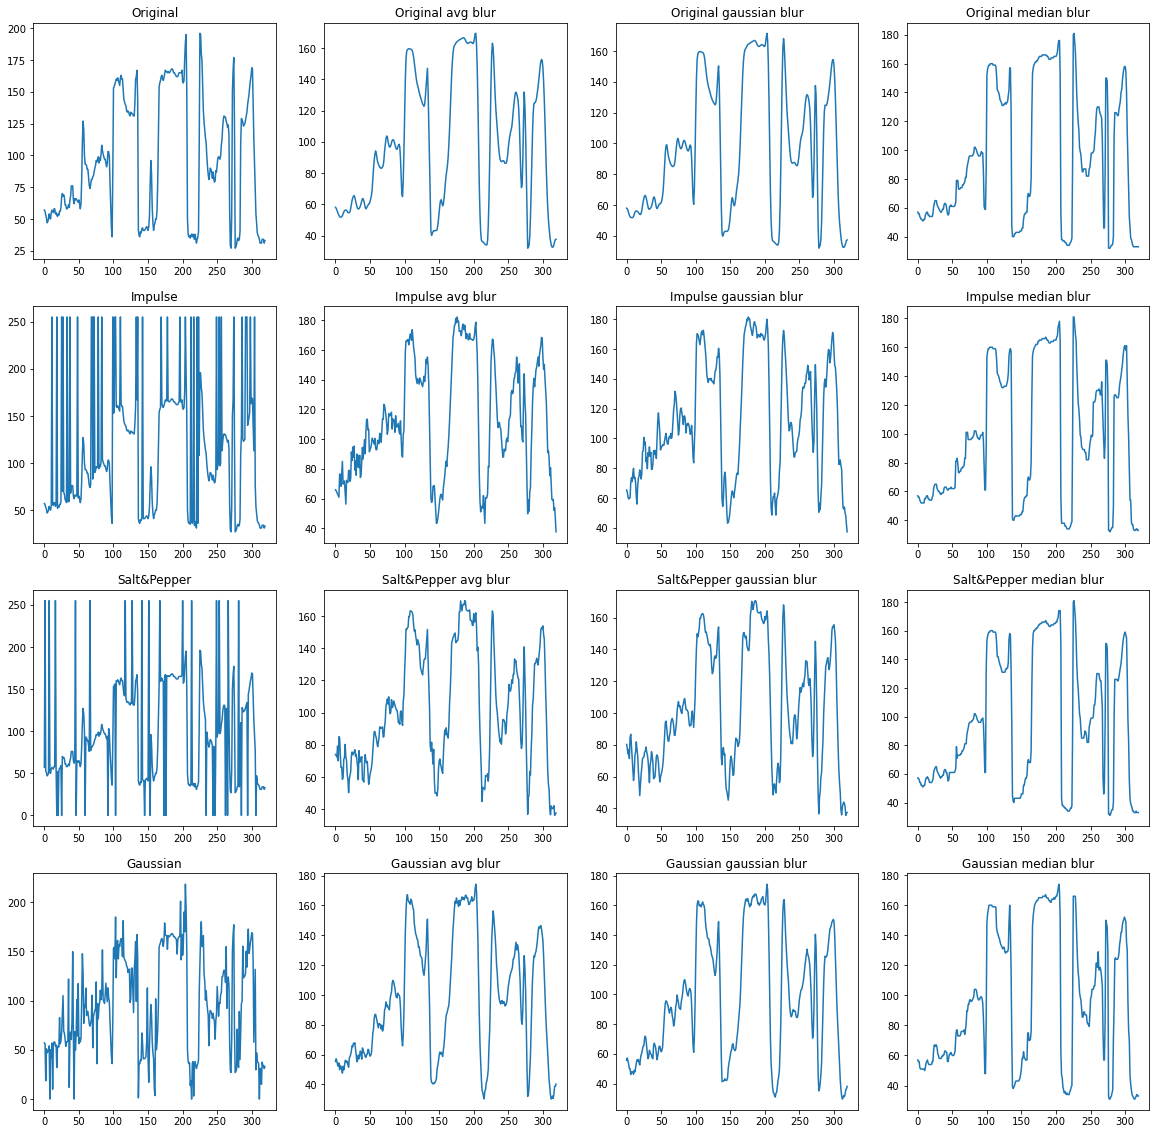

In [12]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes[0][0].plot(x, input_im[50])
axes[0][1].plot(x, input_avg_blur_im[50])
axes[0][2].plot(x, input_gaussian_blur_im[50])
axes[0][3].plot(x, input_median_blur_im[50])

axes[1][0].plot(x, impulse_im[50])
axes[1][1].plot(x, impulse_avg_blur_im[50])
axes[1][2].plot(x, impulse_gaussian_blur_im[50])
axes[1][3].plot(x, impulse_median_blur_im[50])


axes[2][0].plot(x, salt_pepper_im[50])
axes[2][1].plot(x, salt_pepper_avg_blur_im[50])
axes[2][2].plot(x, salt_pepper_gaussian_blur_im[50])
axes[2][3].plot(x, salt_pepper_median_blur_im[50])

axes[3][0].plot(x, gaussian_im[50])
axes[3][1].plot(x, gaussian_avg_blur_im[50])
axes[3][2].plot(x, gaussian_gaussian_blur_im[50])
axes[3][3].plot(x, gaussian_median_blur_im[50])

axes[0][0].set_title('Original')
axes[0][1].set_title('Original avg blur')
axes[0][2].set_title('Original gaussian blur')
axes[0][3].set_title('Original median blur')

axes[1][0].set_title('Impulse')
axes[1][1].set_title('Impulse avg blur')
axes[1][2].set_title('Impulse gaussian blur')
axes[1][3].set_title('Impulse median blur')

axes[2][0].set_title('Salt&Pepper')
axes[2][1].set_title('Salt&Pepper avg blur')
axes[2][2].set_title('Salt&Pepper gaussian blur')
axes[2][3].set_title('Salt&Pepper median blur')

axes[3][0].set_title('Gaussian')
axes[3][1].set_title('Gaussian avg blur')
axes[3][2].set_title('Gaussian gaussian blur')
axes[3][3].set_title('Gaussian median blur')

# Sharpening High-Pass Filter

In [13]:
def high_pass(im, ks, scale=2):
    low_pass_kernel = np.ones((ks, ks)) / (ks * ks)
    high_pass_kernel = np.zeros((ks, ks))
    i = int(ks / 2)
    high_pass_kernel[i, i] = scale
    kernel = high_pass_kernel - low_pass_kernel
    print(kernel)
    image = ndimage.convolve(im, kernel, mode='wrap')
    return image

In [14]:
high_pass_im = high_pass(input_im, 7, 1)

[[-0.02040816 -0.02040816 -0.02040816 -0.02040816 -0.02040816 -0.02040816
  -0.02040816]
 [-0.02040816 -0.02040816 -0.02040816 -0.02040816 -0.02040816 -0.02040816
  -0.02040816]
 [-0.02040816 -0.02040816 -0.02040816 -0.02040816 -0.02040816 -0.02040816
  -0.02040816]
 [-0.02040816 -0.02040816 -0.02040816  0.97959184 -0.02040816 -0.02040816
  -0.02040816]
 [-0.02040816 -0.02040816 -0.02040816 -0.02040816 -0.02040816 -0.02040816
  -0.02040816]
 [-0.02040816 -0.02040816 -0.02040816 -0.02040816 -0.02040816 -0.02040816
  -0.02040816]
 [-0.02040816 -0.02040816 -0.02040816 -0.02040816 -0.02040816 -0.02040816
  -0.02040816]]


Text(0.5, 1.0, 'high_pass')

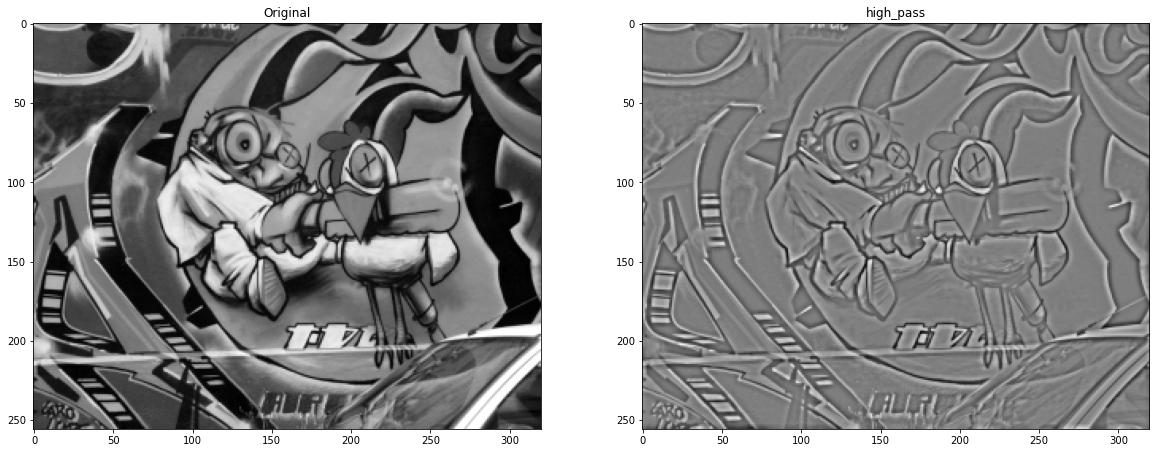

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(input_im, cmap='gray')
axes[0].set_title('Original')

axes[1].imshow(high_pass_im, cmap='gray')
axes[1].set_title('high_pass')

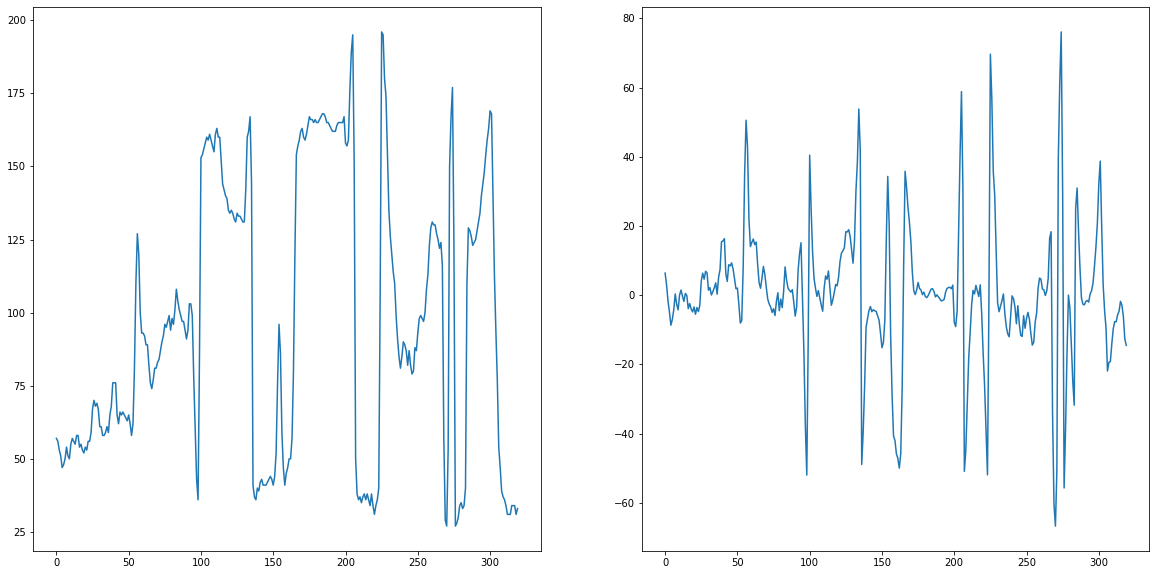

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].plot(x, input_im[50])
axes[1].plot(x, high_pass_im[50])